* Machine learning(머신러닝)은 인공지능(AI)의 하위 집합으로 학습과 개선을 위해 명시적으로 컴퓨터를 프로그래밍하는 대신, 컴퓨터가 데이터로 학습하고 경험을 통해 개선하도록 훈련하는 데 중점을 두고 있다.

* Supervised ML (지도학습)
> **Labeling된 데이터세트를 사용하여 데이터를 분류하거나 정확하게 결과를 예측하는 알고리즘을 훈련시키는 것으로 정의** 
  입력 값(X data)이 주어지면 입력값에 대한 Label(Y data)를 주어 학습  
  지도학습의 목적은 목표변수를 예측할 수 있는 모델을 구축하는 것   

* 특성(Feature)  
  머신러닝은 어떤 데이터를 분류하거나, 값을 예측(회귀)하는 것이다. 데이터의 값을 잘 예측하기 위한 데이터의 특징들을 머신러닝/딥러닝에서는 "Feature"라고 부르며, 적절한 "Feature"를 정의하는 것이 머신러닝의 핵심

* Classification(분류)  
  **기존에 존재하는 데이터의 Category 관계를 파악하고, 새롭게 관측된 데이터의 Category를 스스로 판별하는 과정**
   

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn import datasets
df = datasets.load_iris()
type(df)

sklearn.utils.Bunch

In [3]:
print(df.keys())
print(type(df.data))
print(type(df.target))

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
# sample은 행, feature은 열 
# 150개의 샘플, 4개의 꽃잎길이, 너비, 꽃받침 길이, 너비 
df.data.shape

(150, 4)

In [5]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# EDA
X = df.data
y = df.target
df_data = pd.DataFrame(X , columns = df.feature_names)
df_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


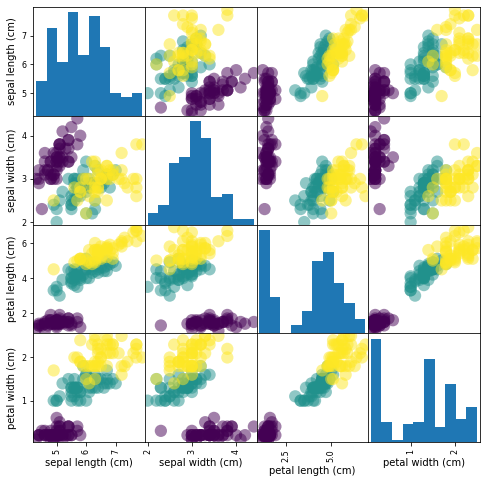

In [7]:
# 산점도 행렬 
#  데이터의 특성 중 하나를 x 축에 놓고 다른 특성 중 하나를 y 축에 놓아, 두 특성의 관계를 하나의 점으로 나타내는 그래프
_ = pd.plotting.scatter_matrix(df_data ,  c = y , figsize = [8,8] , s = 150 , marker = 'o')

### K-Nearest Neighbors(K- 최근접 이웃 - 데이터를 가장 가까운 유사속성에 따라 분류하여 라벨링)

K-NN은 지도학습에 한 종류로 거리기반 분류분석 모델 , 기존 관측치의 Y값(Class)가 존재한다는 점에서 비지도 학습인 클러스터링과 차이가 있다.

 
**K-NN은 데이터로부터 거리가 가까운 K개의 다른 데이터의 레이블을 참조하여 분류하는 알고리즘,**
데이터간 거리를 측정할 때 유클리디안 거리 계산법을 사용한다.  

**K-NN은 판별하고 싶은 데이터와 인접한 K개의 데이터를 찾아, 해당 데이터의 라벨이 다수인 범주로 데이터를 분류**  

인스턴스 기반 학습방법은 훈련세트에서 본 라벨된 표본들을 기억하는 방식으로 작동, 기억한 표본들을 사용해서 새로운 물체들을 분류

<img src="https://miro.medium.com/max/858/0*m2EojvvMx-Knhgy_.png" width = "600px" heigh="300px"><img>

K-NN 알고리즘 장/단점 

> 알고리즘이 간단하여 구현하기가 쉽고 모델 훈련시간이 필요 없다는 장점이 있다. 

> 다른 머신러닝 알고리즘과 달리 모델을 생성하지 않아, 특징과 클래스 간 관계를 이해하는데 제한적이며 , 데이터가 많아질 수록 분류 속도가 느려지고 계산량이 많아진다는 단점 존재

In [8]:
# 현재 가진 유일한 라벨된 데이터는 주어진 데이터세트 뿐이므로 미래의 표본들에 대해 분류자가 얼마나 
#잘 작동하는지 측정하기 위해서는 원본데이터세트를 두 부분으로 나누어야 한다.
#traing set는 분류자 훈련을 위한 라벨된 표본을 얻을 것이고 남은 라벨된 표본들은 따로 테스트세트로 만들어 이후에 
# 훈련된 분류자를 평가하는데 사용

from sklearn.model_selection import train_test_split 


# test_sieze 원본데이터의 비율 설정 , random_state = 데이터를 훈련 및 테스트로 분할하는 난수 생성기의 시드 설정 (재현가능성)         
# 기본적으로 설정이 없다면 train data 75 % , test data 25% 
# stratify = y 레이블이 원래 데이터 세트에 있는 그대로 train, test set에 적용 

X_train , X_test , y_train , y_test  = train_test_split(X, y, test_size = 0.3 , stratify = y,random_state = 0) 

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# k개의 개수는 홀수로 하는 것이 이상적, K개가 짝수일 경우 동점상황이 발생할 수도 있기 때문 
# k가 증가하면 결정경계가 더 부드러워지고 덜 굴곡진다. 

knn = KNeighborsClassifier(n_neighbors = 5)

In [10]:
#데이터의 모델을 훈련시킨다는 의미는 데이터에 대한 모델을 fitting 한다와 동일한 의미 fit() method
knn.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
# predict() method는 레이블이 없는 데이터 포인트의 레이블을 예측하는데 사용

y_pred = knn.predict(X_test)
print(f"Test set predictions : {y_pred}") 

#sklearn API는 데이터가 numpy or dataframe이여야 한다.
# 연속값을 가져야하고 NaN값이 없어야한다.

Test set predictions : [2 2 0 0 1 0 1 2 0 1 0 2 0 2 1 2 1 1 1 0 1 2 0 1 2 2 2 2 1 2 1 0 0 1 1 2 1
 0 0 1 0 2 0 0 2]


In [12]:
# 모델의 정확성 확인 
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 1.00


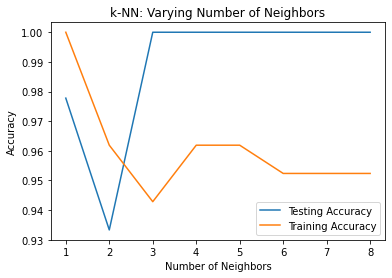

In [13]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

정규화(Normalization)  
K-NN 알고리즘을 사용할 때는 모든 특성들을 모두 고르게 반영하기 위해 정규화를 해주곤 한다.  
1. 최소값을 0, 최대값을 1로 고정한 뒤 모든 값들을 0과 1사이에 변환하는 방법  
2. 평균과 표준편차를 활용해서 평균으로부터 얼마나 떨어져 있는지 z-점수로 변환하는 방법  

k가 너무 작을 때 : Overfitting 

>k가 너무 작은 경우.분류 정확도가 상당히 낮을 수밖에 없다. 시야가 좁아지고, 근처에 있는 점 하나에 민감하게 영향을 받기 때문이다. 이를 overfitting(과적합)이라고 한다.

>모델의 파라미터들을 학습데이터에 너무 가깝게 맞췄을때 발생하는 현상 너무 세밀하게 학습데이터를 모두 설명하려고 하다보니 정작중요한 패턴을 설명할 수 없게 되는 현상  

>Overfitting 문제를 해결하는 방법  
 데이터 자세히 살펴보기 - 통계치 확인, 집단별 통계치 확인  
 수집된 데이터가 적절한지 검토 - 머신러닝 모델을 적용하고자 하는 모든 집단으로부터 골고루 수집된 데이터인지 확인할 필요도 있다. 
 수집된 데이터가 특정 장면에만 적용되는 것이라면 애초에 보편적으로 적용할 수 있는 모델이 아니니까. 특정 집단의 특성만 반영할 가능성이 높다.
 학습 데이터 보강(Augmentation) - 케이스를 임의적으로 추가시켜서 다양한 케이스를 확보하여 오버피팅을 줄여주는 방법(ex 불법신용카드거래감지)   학습 데이터에 포함될 특성(featureset)을 제한 - 어떤 특성이 모델에 영향을 과도하게 미치는 경우에는 오히려 해당 특성을 제거하고 모델을 학습하는 전략  

k가 너무 클 때 : Underfitting(과소적합)  
>모델이 너무 간단하기 때문에 학습 오류가 줄어들지 않는 것입니다. 이 현상을 언더피팅(underfitting)

In [14]:
# 각 Feature마다 값의 범위가 다르다. 각 Feature의 값을 일정한 범위 또는 규칙에 따르게 하기 위해서 스케일링을 사용
# 최소값(Min)과 최대값(Max)을 사용해서 '0~1' 사이의 범위(range)로 데이터를 표준화해주는 '0~1 변환

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
X_train_scalar = scalar.fit_transform(X_train)
X_test_scalar = scalar.transform(X_test)

In [15]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train_scalar , y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scalar, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scalar, y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.98


In [16]:
# 분류자의 출력물을 알기 쉽도록 이름으로 변환 
f_name = dict(zip(np.unique(df.target) , np.unique(df.target_names)))
f_name

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [17]:
# sepal length (cm) , sepal width (cm) , petal length (cm) , petal width (cm)
iris_prediction = knn.predict([[5.0 ,3.5, 1.2, 0.3]])
f_name[iris_prediction[0]]

'virginica'

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

